## Observations and Insights

## Dependencies and starter code

In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Pymaceuticals/data/Mouse_metadata.csv"
study_results = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
# school_data_complete = pd.merge(student_data, school_data, how="left", on=["Mouse ID", "Mouse ID"])

data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


tumor_summary_table = pd.DataFrame({
    "Tumor Mean":data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean(),
    "Tumor Median":data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median(),
    "Tumor Variance":data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var(),
    "Tumor Stdev":data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std(),
    "Tumor SEM":data.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem(),
})

tumor_summary_table

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Number of Data Points')

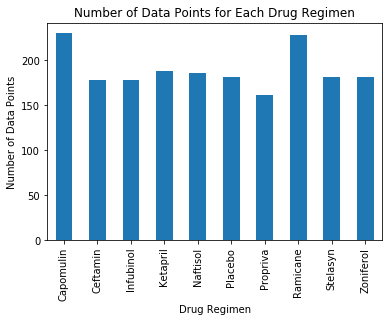

In [218]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

bar_data = data.groupby(["Drug Regimen"])['Mouse ID'].count()
bar_data.plot(kind="bar", title="Number of Data Points for Each Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

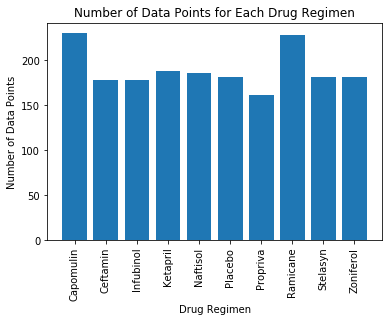

In [219]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

treatment_data = bar_data.index.to_list()
plt.bar(treatment_data, bar_data)


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation='vertical')

## Pie plots

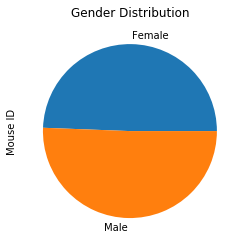

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = data.groupby(["Sex"]).count()['Mouse ID']

pieplt= gender.plot.pie(y='Sex', title='Gender Distribution')


Text(0, 0.5, 'Gender Distribution')

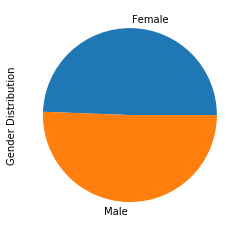

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender, labels=["Female","Male"])

plt.ylabel('Gender Distribution')

## Quartiles, outliers and boxplots

In [222]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

promising_regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']

regxmice = data.groupby(["Drug Regimen","Mouse ID"]).last()
best_reg = [r for r in promising_regimens]
reg_l = [regxmice['Tumor Volume (mm3)'][best_reg]]
promising_treatments = pd.DataFrame(reg_l).transpose().reset_index()
promising_treatments

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [223]:
tvolume = [promising_treatments.loc[regi_output_df['Drug Regimen'] == promising_regimens[i], 'Tumor Volume (mm3)'] for i in range(4)]
for i in range(0, 4):
    quartiles = tvolume[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_b = lowerq - (1.5*iqr)
    upper_b = upperq + (1.5*iqr)
    print(f"IQR Regimen #{i+1}: {iqr}. Potential outliers are {lower_b}, {upper_b}")


IQR Regimen #1: 7.78. Potential outliers are 20.707356839999996, 51.8292203
IQR Regimen #2: 15.58. Potential outliers are 25.352077849999997, 87.66983003
IQR Regimen #3: 11.48. Potential outliers are 36.82860769, 82.74574285
IQR Regimen #4: 9.1. Potential outliers are 17.910469550000002, 54.30900627


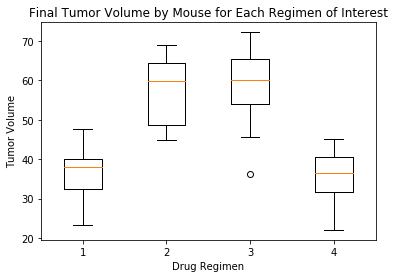

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot(tvolume)
ax1.set_title('Final Tumor Volume by Mouse for Each Regimen of Interest')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Campolin Treatment Mouse - Tumor Volume Over Days')

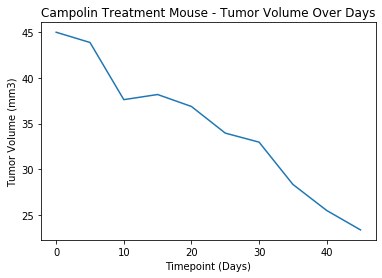

In [225]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_tvolume = (data['Tumor Volume (mm3)'][10:20].to_list())
capo_time = (data['Timepoint'][10:20].to_list())
plt.plot(capo_time, capo_tvolume)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Campolin Treatment Mouse - Tumor Volume Over Days")

<function matplotlib.pyplot.show(*args, **kw)>

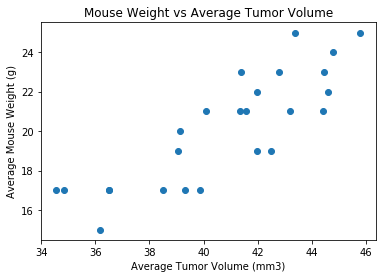

In [226]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice = data.groupby(["Mouse ID"]) 

#Sub-section for Capomulin Group
capo_mice = data[data['Drug Regimen'] == 'Capomulin']

#Remove Duplicate mice 
capo_mice_unique = capo_mice['Mouse ID'].unique()

#Slice by column
capo_mice_vol = pd.Series([mice.get_group(m)['Tumor Volume (mm3)'].mean() for m in capo_mice_unique])
capo_mice_wg = pd.Series([mice.get_group(m)['Weight (g)'].sum()/mice.get_group(m)['Weight (g)'].count() for m in capo_mice_unique])
plt.scatter(capo_mice_vol, capo_mice_wg)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Mouse Weight (g)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.savefig('capo_mice_averages')
plt.show

